# placement-project-logistic-regression

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="placement-project-logistic-regression")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ivarchan/placement-project-logistic-regression" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ivarchan/placement-project-logistic-regression


'https://jovian.ai/ivarchan/placement-project-logistic-regression'

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('placement.csv')

In [6]:
df.head()

Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [8]:
df.shape

(100, 4)

In [9]:
df = df.iloc[:,1:]

In [10]:
df

cgpa     iq  placement
0    6.8  123.0          1
1    5.9  106.0          0
2    5.3  121.0          0
3    7.4  132.0          1
4    5.8  142.0          0
..   ...    ...        ...
95   4.3  200.0          0
96   4.4   42.0          0
97   6.7  182.0          1
98   6.3  103.0          1
99   6.2  113.0          1

[100 rows x 3 columns]

## Steps

##### 0. Preprocess + EDA + Feature Selection
##### 1. Extract input and output cols
##### 2. Scale the values
##### 3. Train test split
##### 4. Train the model
##### 5. Evaluate the model/model selection
##### 6. Deploy the model

In [11]:
import matplotlib.pyplot as plt

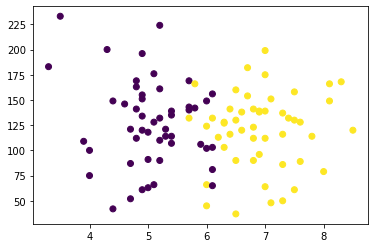

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]

In [17]:
y.shape

(100,)

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [19]:
X_train

cgpa     iq
47   5.2  161.0
46   5.3  114.0
19   5.2  132.0
27   6.0  124.0
38   6.5  160.0
..   ...    ...
57   6.5  130.0
61   7.3  137.0
84   5.7  169.0
70   6.3  127.0
3    7.4  132.0

[90 rows x 2 columns]

In [20]:
y_train

47    0
46    0
19    0
27    1
38    1
     ..
57    1
61    1
84    0
70    1
3     1
Name: placement, Length: 90, dtype: int64

In [21]:
X_test

cgpa     iq
64   7.0   64.0
87   5.7  132.0
16   5.2  224.0
73   4.9   61.0
66   6.9   96.0
4    5.8  142.0
76   4.9  155.0
59   4.8  112.0
98   6.3  103.0
63   6.3  128.0

In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_train

array([[-0.69709662,  0.95142779],
       [-0.61150495, -0.25028602],
       [-0.69709662,  0.2099448 ],
       [-0.01236324,  0.00539777],
       [ 0.41559512,  0.92585941],
       [-0.01236324,  0.64460724],
       [ 0.75796181,  0.36335507],
       [ 0.67237014,  0.44006021],
       [ 0.67237014, -0.86392711],
       [ 0.75796181,  0.38892345],
       [ 1.52828687, -0.25028602],
       [-0.86827997, -0.83835873],
       [ 0.84355349,  0.38892345],
       [ 0.07322843, -0.53153819],
       [-0.26913826,  0.41449183],
       [ 0.50118679,  0.36335507],
       [-0.7826883 ,  1.33495347],
       [-0.01236324, -1.47756821],
       [ 1.69947021, -1.14517928],
       [ 1.1003285 , -0.96620063],
       [-0.95387164,  0.695744  ],
       [ 1.1003285 , -1.88666227],
       [ 0.58677847,  1.48836374],
       [ 0.1588201 , -0.2758544 ],
       [-1.21064666,  0.5679021 ],
       [-0.95387164,  0.26108156],
       [ 0.07322843, -1.50313659],
       [-0.86827997, -1.55427334],
       [ 1.95624523,

In [27]:
X_test = scaler.transform(X_test)

In [28]:
X_test

array([[ 0.84355349, -1.52870496],
       [-0.26913826,  0.2099448 ],
       [-0.69709662,  2.56223566],
       [-0.95387164, -1.6054101 ],
       [ 0.75796181, -0.71051684],
       [-0.18354659,  0.46562859],
       [-0.95387164,  0.79801751],
       [-1.03946331, -0.30142278],
       [ 0.24441178, -0.53153819],
       [ 0.24441178,  0.10767128]])

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression()

In [31]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred = clf.predict(X_test)

In [33]:
y_test

64    1
87    1
16    0
73    0
66    1
4     0
76    0
59    0
98    1
63    1
Name: placement, dtype: int64

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,y_pred)

0.9

In [37]:
!pip install mlxtend 

     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 1.3 MB 6.6 MB/s eta 0:00:01


In [38]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

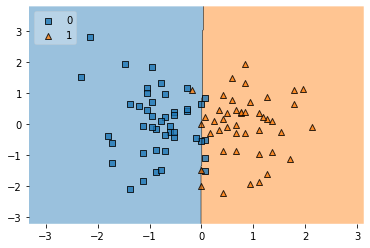

In [39]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [40]:
import pickle

In [41]:
pickle.dump(clf,open('model.pkl','wb'))